In [26]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [47]:
# Read the CSV file
df = pd.read_csv('./data/IpAddress_to_Country.csv')

In [3]:
# Set up logging
logging.basicConfig(filename='./LogMonitor/IpAddress_to_CountryCleaning.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [48]:
# Check for missing values
missing_values = df.isnull().sum()
logging.info("Missing values:\n %s", missing_values)

In [49]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)
logging.info("Duplicate entries removed.")

In [52]:
# Remove leading and trailing whitespaces in IP address and country columns
df['lower_bound_ip_address'] = df['lower_bound_ip_address'].str.strip()
df['upper_bound_ip_address'] = df['upper_bound_ip_address'].astype(str).str.strip()
df['country'] = df['country'].str.strip()
logging.info("Leading and trailing whitespaces removed")


In [51]:
# Standardize IP address format
df['lower_bound_ip_address'] = df['lower_bound_ip_address'].astype(str).apply(lambda x: x.replace(".", ""))
df['upper_bound_ip_address'] = df['upper_bound_ip_address'].astype(str).apply(lambda x: x.replace(".", ""))
logging.info("IP address format standardized")

In [53]:
# Check for and handle outliers or invalid IP address ranges
df['lower_bound_ip_address'] = df['lower_bound_ip_address'].astype(float).astype(int)
df['upper_bound_ip_address'] = df['upper_bound_ip_address'].astype(float).astype(int)
df = df[(df['lower_bound_ip_address'] >= 0) & (df['upper_bound_ip_address'] <= 4294967295)]
logging.info("Outliers and invalid IP address ranges handled")


In [55]:
# Convert IP address columns to appropriate data type
df['lower_bound_ip_address'] = df['lower_bound_ip_address'].astype('int64')
df['upper_bound_ip_address'] = df['upper_bound_ip_address'].astype('int64')
logging.info("IP address columns converted to int64")

In [57]:
# Perform data type conversions and transformations
df['country'] = df['country'].str.upper()
logging.info("Country names normalized to uppercase")


In [59]:
# Handle special characters or encoding issues
df['country'] = df['country'].str.replace('special_char', 'replacement_char')
logging.info("Special characters handled")


In [60]:
# Save the cleaned dataset
df.to_csv('cleaned_ip_mapping_dataset.csv', index=False)
logging.info("Cleaned dataset saved")

EDA

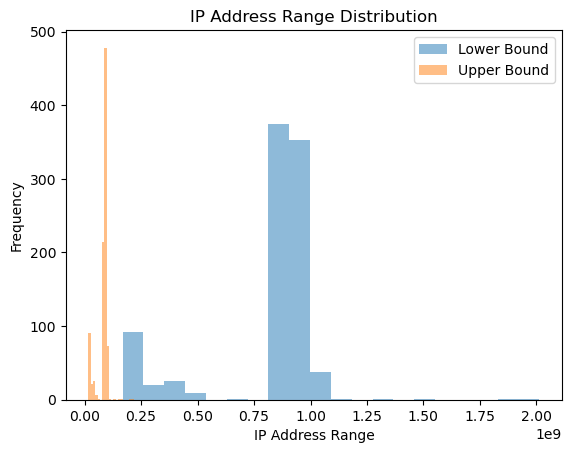

In [63]:
# 1. IP Address Range Distribution (Histogram)
plt.hist(df['lower_bound_ip_address'], bins=20, alpha=0.5, label='Lower Bound')
plt.hist(df['upper_bound_ip_address'], bins=20, alpha=0.5, label='Upper Bound')
plt.xlabel('IP Address Range')
plt.ylabel('Frequency')
plt.title('IP Address Range Distribution')
plt.legend()
plt.show()

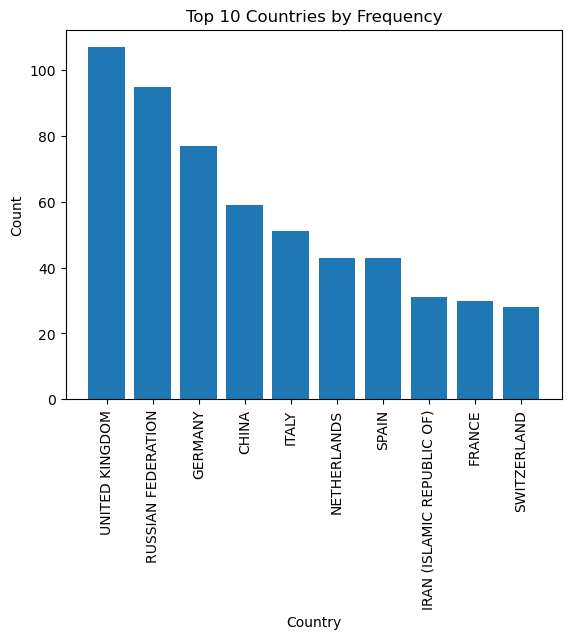

In [65]:
# 2. Country Distribution (Bar Chart)
# Select top 10 countries
top_countries = country_counts.head(10)

# Plot bar chart for top 10 countries
plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Frequency')
plt.xticks(rotation=90)
plt.show()

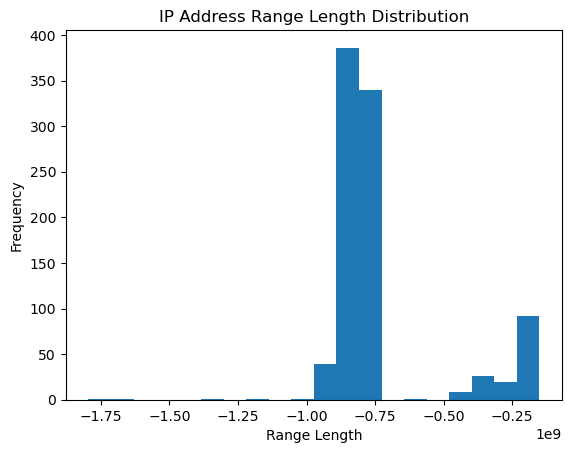

In [66]:
# 3. IP Address Range Length (Histogram)
df['range_length'] = df['upper_bound_ip_address'] - df['lower_bound_ip_address']
plt.hist(df['range_length'], bins=20)
plt.xlabel('Range Length')
plt.ylabel('Frequency')
plt.title('IP Address Range Length Distribution')
plt.show()

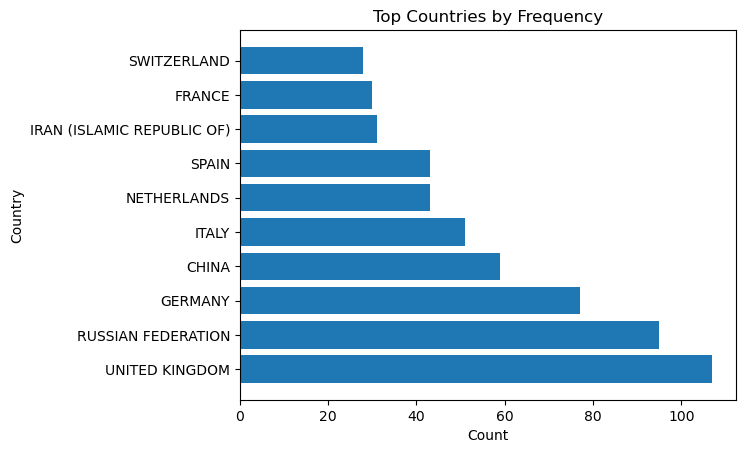

In [67]:
# 4. Top Countries by Frequency (Horizontal Bar Chart)
top_countries = country_counts.head(10)
plt.barh(top_countries.index, top_countries.values)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top Countries by Frequency')
plt.show()

In [68]:
# 5. Geographical Heatmap (Plotly)
fig = px.choropleth(df, locations='country', locationmode='country names', color='range_length',
                    title='IP Address Range Distribution by Country')
fig.show()